In [47]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix


In [48]:
iris = datasets.load_iris()

Lets store our features and target data in $X$ and $y$ variables. 

In [50]:
X, y = iris.data, iris.target

But we will use all 150 instances to train our model because we want to test it. So we will split the $X$ and $y$ while also keeping the class count same i.e. stratify.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, stratify=y, random_state=2)

Now we define our classifier as a pipeline that will first standardize our features and train a classifier. We can try out other classifier by toggle the commented out lines. We have linear support vector classifier (LinearSVC), a neural network or multi layer perceptron with 2 hidden layers (MLPClassifier), decision tree classifier and random forest classifer. For now we have kept the default parameters for the last two. Finally, we will use `yellowbricks` to help us visualize our classifier performance using a confusion matrix.

d:\Programs\miniconda3\envs\dndlab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


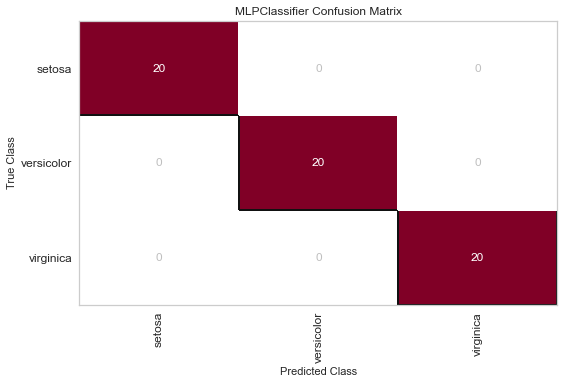

In [86]:
clf = make_pipeline(
    StandardScaler(), 
    # LinearSVC(random_state=0, tol=1e-5),
    MLPClassifier(alpha=1e-3, hidden_layer_sizes=(5, 4), random_state=1, max_iter=1000),
    # DecisionTreeClassifier(),
    # RandomForestClassifier()
)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes=iris.target_names)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();